In [1]:
import requests

import matplotlib.pyplot as plt
import seaborn as sns

import umap, numpy as np, pandas as pd

from nltk import FreqDist

import pandas as pd

from sklearn.decomposition import TruncatedSVD
from scipy import sparse
import numpy as np

from collections import Counter
from scipy.sparse import csr_matrix

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


2025-07-17 02:28:55.009089: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-17 02:28:55.018566: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752712135.029876 2573854 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752712135.032882 2573854 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752712135.040900 2573854 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Or for specific warning types:
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [3]:
labyrinthus_df = pd.read_parquet("../data/large_files/labyrinthus_embeddings.parquet")

In [4]:
labyrinthus_df.columns

Index(['author', 'title', 'grela_id', 'sentence_id', 'sentence_text',
       'context_3sents', 'tokens', 'concordance_tokens', 'not_before',
       'not_after',
       ...
       'att_l11_labert_svd400_embed', 'att_conc_l7_labert_svd400_embed',
       'att_conc_l8_labert_svd400_embed', 'att_conc_l9_labert_svd400_embed',
       'att_conc_l10_labert_svd400_embed', 'att_conc_l11_labert_svd400_embed',
       'svd400', 'svd400_conc', 'cooc_vector', 'cooc_conc_vector'],
      dtype='object', length=116)

## Supervised classification

In [35]:
baseline_embeddings = ['cooc_vector', 'cooc_conc_vector', 'svd400', 'svd400_conc']

xlmr_sentence_contextual_embeddings = [
    'embed_l7_xlmr', 'embed_l8_xlmr', 'embed_l9_xlmr',
    'embed_l10_xlmr', 'embed_l11_xlmr'
]

xlmr_concordance_contextual_embeddings = [
    'embed_conc_l7_xlmr', 'embed_conc_l8_xlmr', 'embed_conc_l9_xlmr',
    'embed_conc_l10_xlmr', 'embed_conc_l11_xlmr'
]


xlmr_sentence_attention_raw_embeddings = [
    'att_l7_xlmr_raw_embed', 'att_l8_xlmr_raw_embed',
    'att_l9_xlmr_raw_embed', 'att_l10_xlmr_raw_embed',
    'att_l11_xlmr_raw_embed'
]

xlmr_sentence_attention_svd400_embeddings = [
    'att_l7_xlmr_svd400_embed', 'att_l8_xlmr_svd400_embed',
    'att_l9_xlmr_svd400_embed', 'att_l10_xlmr_svd400_embed',
    'att_l11_xlmr_svd400_embed'
]

xlmr_concordance_attention_raw_embeddings = [
    'att_conc_l7_xlmr_raw_embed', 'att_conc_l8_xlmr_raw_embed',
    'att_conc_l9_xlmr_raw_embed', 'att_conc_l10_xlmr_raw_embed',
    'att_conc_l11_xlmr_raw_embed']

xlmr_concordance_attention_svd400_embeddings = [
    'att_conc_l7_xlmr_svd400_embed', 'att_conc_l8_xlmr_svd400_embed',
    'att_conc_l9_xlmr_svd400_embed', 'att_conc_l10_xlmr_svd400_embed',
    'att_conc_l11_xlmr_svd400_embed'
]
labert_sentence_contextual_embeddings = [
    'embed_l7_labert', 'embed_l8_labert', 'embed_l9_labert',
    'embed_l10_labert', 'embed_l11_labert'
]

labert_concordance_contextual_embeddings = [
    'embed_conc_l7_labert', 'embed_conc_l8_labert', 'embed_conc_l9_labert',
    'embed_conc_l10_labert', 'embed_conc_l11_labert'
]

labert_sentence_attention_svd400_embeddings = [
    'att_l7_labert_svd400_embed', 'att_l8_labert_svd400_embed',
    'att_l9_labert_svd400_embed', 'att_l10_labert_svd400_embed',
    'att_l11_labert_svd400_embed'
]

labert_sentence_attention_raw_embeddings = [
    'att_l7_labert_raw_embed', 'att_l8_labert_raw_embed',
    'att_l9_labert_raw_embed', 'att_l10_labert_raw_embed',
    'att_l11_labert_raw_embed'
]

labert_concordance_attention_svd400_embeddings = [
    'att_conc_l7_labert_svd400_embed', 'att_conc_l8_labert_svd400_embed',
    'att_conc_l9_labert_svd400_embed', 'att_conc_l10_labert_svd400_embed',
    'att_conc_l11_labert_svd400_embed'
]

labert_concordance_attention_raw_embeddings = [
    'att_conc_l7_labert_raw_embed', 'att_conc_l8_labert_raw_embed',
    'att_conc_l9_labert_raw_embed', 'att_conc_l10_labert_raw_embed',
    'att_conc_l11_labert_raw_embed'
]


In [7]:
# ------------------------------------------------------------------
# common objects
# ------------------------------------------------------------------
y = labyrinthus_df["classification_single_label"].values  # 21 classes incl. “other”
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# basic experiments with contextual embeddings

lr = LogisticRegression(
    max_iter=4000,
    solver="lbfgs",
    n_jobs=-1)

rf = RandomForestClassifier(
    n_estimators=200,  # more trees for stability
    max_depth=None,  # let it grow fully
    n_jobs=-1,  # parallelize
    random_state=42)

hgbc = HistGradientBoostingClassifier(
    random_state=42)

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(512, 128),
                    activation='relu',
                    solver='adam',
                    alpha=1e-4,
                    max_iter=500,
                    random_state=42)

clfs = {"lr" : lr, "rf" : rf, "hgbc" : hgbc, "mlp" : mlp}

In [8]:
emb_col = "cooc_vector"
X = np.stack(labyrinthus_df[emb_col].values)
for clf_name, clf in clfs.items():
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    print({"classifier" : clf_name, "accuracy" : acc, "F1 (macro)" : f1})

{'classifier': 'lr', 'accuracy': 0.5687772925764192, 'F1 (macro)': 0.3842665728347627}
{'classifier': 'rf', 'accuracy': 0.5360262008733624, 'F1 (macro)': 0.4163108113737987}


KeyboardInterrupt: 

In [50]:
emb_col = "cooc_conc_vector"
X = np.stack(labyrinthus_df[emb_col].values)
for clf_name, clf in clfs.items():
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    print({"classifier" : clf_name, "accuracy" : acc, "F1 (macro)" : f1})

{'classifier': 'lr', 'accuracy': 0.584061135371179, 'F1 (macro)': 0.3821019590020936}
{'classifier': 'rf', 'accuracy': 0.574235807860262, 'F1 (macro)': 0.3926735866597445}
{'classifier': 'hgbc', 'accuracy': 0.36026200873362446, 'F1 (macro)': 0.17488587586767865}
{'classifier': 'mlp', 'accuracy': 0.5720524017467249, 'F1 (macro)': 0.44734542571440333}


In [51]:
emb_col = "svd400"
X = np.stack(labyrinthus_df[emb_col].values)
for clf_name, clf in clfs.items():
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    print({"classifier" : clf_name, "accuracy" : acc, "F1 (macro)" : f1})

{'classifier': 'lr', 'accuracy': 0.5709606986899564, 'F1 (macro)': 0.4456921869646604}
{'classifier': 'rf', 'accuracy': 0.5141921397379913, 'F1 (macro)': 0.30449130342100367}
{'classifier': 'hgbc', 'accuracy': 0.5294759825327511, 'F1 (macro)': 0.42043503302707996}
{'classifier': 'mlp', 'accuracy': 0.5152838427947598, 'F1 (macro)': 0.42667211569351665}


In [52]:
emb_col = "svd400_conc"
X = np.stack(labyrinthus_df[emb_col].values)
for clf_name, clf in clfs.items():
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    print({"classifier" : clf_name, "accuracy" : acc, "F1 (macro)" : f1})

{'classifier': 'lr', 'accuracy': 0.5698689956331878, 'F1 (macro)': 0.37295515432552173}
{'classifier': 'rf', 'accuracy': 0.5251091703056768, 'F1 (macro)': 0.29671732703907516}
{'classifier': 'hgbc', 'accuracy': 0.5327510917030568, 'F1 (macro)': 0.3719234075998257}
{'classifier': 'mlp', 'accuracy': 0.5141921397379913, 'F1 (macro)': 0.39770919362492513}


In [55]:
emb_col = "att_conc_l11_labert_raw_embed"
X = np.stack(labyrinthus_df[emb_col].values)
for clf_name, clf in clfs.items():
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    print({"classifier" : clf_name, "accuracy" : acc, "F1 (macro)" : f1})

{'classifier': 'lr', 'accuracy': 0.2521834061135371, 'F1 (macro)': 0.07218616527817326}
{'classifier': 'rf', 'accuracy': 0.5382096069868996, 'F1 (macro)': 0.3554863552595536}
{'classifier': 'hgbc', 'accuracy': 0.3231441048034934, 'F1 (macro)': 0.16266127000982594}
{'classifier': 'mlp', 'accuracy': 0.5087336244541485, 'F1 (macro)': 0.38029558625710763}


In [53]:
emb_col = "att_conc_l11_xlmr_raw_embed"
X = np.stack(labyrinthus_df[emb_col].values)
for clf_name, clf in clfs.items():
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    print({"classifier" : clf_name, "accuracy" : acc, "F1 (macro)" : f1})

{'classifier': 'lr', 'accuracy': 0.22489082969432314, 'F1 (macro)': 0.04804928396529645}
{'classifier': 'rf', 'accuracy': 0.5251091703056768, 'F1 (macro)': 0.37391618525771764}
{'classifier': 'hgbc', 'accuracy': 0.3155021834061135, 'F1 (macro)': 0.15380838074621034}
{'classifier': 'mlp', 'accuracy': 0.47707423580786024, 'F1 (macro)': 0.3725836187528947}


In [54]:
emb_col = "att_conc_l11_xlmr_svd400_embed"
X = np.stack(labyrinthus_df[emb_col].values)
for clf_name, clf in clfs.items():
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    print({"classifier" : clf_name, "accuracy" : acc, "F1 (macro)" : f1})

{'classifier': 'lr', 'accuracy': 0.21179039301310043, 'F1 (macro)': 0.03495495495495495}
{'classifier': 'rf', 'accuracy': 0.5163755458515283, 'F1 (macro)': 0.2999365021112941}
{'classifier': 'hgbc', 'accuracy': 0.527292576419214, 'F1 (macro)': 0.32604256020248135}
{'classifier': 'mlp', 'accuracy': 0.5032751091703057, 'F1 (macro)': 0.37935427966618135}


In [9]:
# appending basic experiments with concatenation of contextual and attention embeddings


def concatenate_embeddings(df: pd.DataFrame, columns: list[str]) -> np.ndarray:
    """
    Concatenate and stack embeddings from the specified columns for each row.
    Each selected column must contain array-like (same-length) embeddings per row.

    Returns
    -------
    emb_array : np.ndarray
        Shape (num_rows, total_embedding_dim)
    """
    # Each result is a single flat vector for one row (concatenating all columns)
    concat_rows = [
        np.concatenate([df[col].iloc[i] for col in columns])
        for i in range(len(df))
    ]
    return np.stack(concat_rows)

In [ ]:
L = 11
model = "xlmr"
emb1 = f"embed_l{L}_{model}"
emb2 = f"att_l{L}_{model}_raw_embed"
X = concatenate_embeddings(labyrinthus_df, [emb1, emb2])
for clf_name, clf in clfs.items():
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    print({"classifier" : clf_name, "accuracy" : acc, "F1 (macro)" : f1})

In [57]:
L = 7
model = "xlmr"
emb1 = f"embed_l{L}_{model}"
emb2 = f"att_l{L}_{model}_raw_embed"
X = concatenate_embeddings(labyrinthus_df, [emb1, emb2])
for clf_name, clf in clfs.items():
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    print({"classifier" : clf_name, "accuracy" : acc, "F1 (macro)" : f1})

{'classifier': 'lr', 'accuracy': 0.5109170305676856, 'F1 (macro)': 0.3438999984371011}
{'classifier': 'rf', 'accuracy': 0.4781659388646288, 'F1 (macro)': 0.25482345939123424}
{'classifier': 'hgbc', 'accuracy': 0.517467248908297, 'F1 (macro)': 0.3421811166153382}
{'classifier': 'mlp', 'accuracy': 0.4923580786026201, 'F1 (macro)': 0.3422408043146724}


In [58]:
L = 11
model = "labert"
emb1 = f"embed_l{L}_{model}"
emb2 = f"att_l{L}_{model}_raw_embed"
X = concatenate_embeddings(labyrinthus_df, [emb1, emb2])
for clf_name, clf in clfs.items():
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    print({"classifier" : clf_name, "accuracy" : acc, "F1 (macro)" : f1})

{'classifier': 'lr', 'accuracy': 0.5141921397379913, 'F1 (macro)': 0.3226561677361449}
{'classifier': 'rf', 'accuracy': 0.4705240174672489, 'F1 (macro)': 0.22164285079128185}
{'classifier': 'hgbc', 'accuracy': 0.50764192139738, 'F1 (macro)': 0.3348792560392984}
{'classifier': 'mlp', 'accuracy': 0.519650655021834, 'F1 (macro)': 0.3727118194328278}


In [ ]:
L = 8
model = "labert"
emb1 = f"embed_l{L}_{model}"
emb2 = f"att_l{L}_{model}_raw_embed"
X = concatenate_embeddings(labyrinthus_df, [emb1, emb2])
for clf_name, clf in clfs.items():
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    print({"classifier" : clf_name, "accuracy" : acc, "F1 (macro)" : f1})

In [59]:
L = 8
model = "xlmr"
emb1 = f"embed_conc_l{L}_{model}"
emb2 = "cooc_vector"
X = concatenate_embeddings(labyrinthus_df, [emb1, emb2])
for clf_name, clf in clfs.items():
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    print({"classifier" : clf_name, "accuracy" : acc, "F1 (macro)" : f1})

{'classifier': 'lr', 'accuracy': 0.5851528384279476, 'F1 (macro)': 0.4094016453179304}
{'classifier': 'rf', 'accuracy': 0.5120087336244541, 'F1 (macro)': 0.2920573324478953}
{'classifier': 'hgbc', 'accuracy': 0.5578602620087336, 'F1 (macro)': 0.35564564644423025}
{'classifier': 'mlp', 'accuracy': 0.5917030567685589, 'F1 (macro)': 0.46595300139416196}


In [61]:
L = 8
model = "xlmr"
emb1 = f"embed_conc_l{L}_{model}"
emb2 = "cooc_conc_vector"
X = concatenate_embeddings(labyrinthus_df, [emb1, emb2])
for clf_name, clf in clfs.items():
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average="macro")
    print({"classifier" : clf_name, "accuracy" : acc, "F1 (macro)" : f1})

{'classifier': 'lr', 'accuracy': 0.5862445414847162, 'F1 (macro)': 0.407310259786896}
{'classifier': 'rf', 'accuracy': 0.5218340611353712, 'F1 (macro)': 0.29862143046945955}
{'classifier': 'hgbc', 'accuracy': 0.5262008733624454, 'F1 (macro)': 0.33432094881045465}
{'classifier': 'mlp', 'accuracy': 0.601528384279476, 'F1 (macro)': 0.48971902029585496}


In [15]:
results = []

def eval_model(X, y, clf, n_splits=5, repeats=10):
    f1s = []
    for n in range(repeats):
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=n)
        y_pred = cross_val_predict(clf, X, y, cv=cv, n_jobs=-1)
        f1 = f1_score(y, y_pred, average="macro")
        f1s.append(f1)
    return {
        "f1_avg": np.mean(f1s),
        "f1_std": np.std(f1s),
        "f1_max": np.max(f1s)
    }

# ─────────────────────────────── Baseline loop ────────────────────────────────
for emb_col in ["cooc_vector", "cooc_conc_vector", "svd400", "svd400_conc"]:
    context = "concordance" if "conc" in emb_col else "sentence"

    results_dict = {
        "variable_name": emb_col,
        "model": "baseline",
        "context": context
    }

    X = np.stack(labyrinthus_df[emb_col].values)

    for clf_name, clf in clfs.items():
        scores = eval_model(X, y, clf)
        results_dict[f"{clf_name}_f1_avg"] = scores["f1_avg"]
        results_dict[f"{clf_name}_f1_std"] = scores["f1_std"]
        results_dict[f"{clf_name}_f1_max"] = scores["f1_max"]
    print(results_dict)
    results.append(results_dict)

{'variable_name': 'cooc_vector', 'model': 'baseline', 'context': 'sentence', 'lr_f1_avg': 0.3769910600693989, 'lr_f1_std': 0.01512254967397604, 'lr_f1_max': 0.4134415850143707, 'rf_f1_avg': 0.41288931670754414, 'rf_f1_std': 0.013197904415519346, 'rf_f1_max': 0.4332255798427271, 'hgbc_f1_avg': 0.24793012699439348, 'hgbc_f1_std': 0.010524068213426586, 'hgbc_f1_max': 0.2724908761241161, 'mlp_f1_avg': 0.44038748788022525, 'mlp_f1_std': 0.014275546235502536, 'mlp_f1_max': 0.46229633422270505}
{'variable_name': 'cooc_conc_vector', 'model': 'baseline', 'context': 'concordance', 'lr_f1_avg': 0.37483754809036246, 'lr_f1_std': 0.008683852159989253, 'lr_f1_max': 0.3915131737887156, 'rf_f1_avg': 0.388998599655621, 'rf_f1_std': 0.02205081814611596, 'rf_f1_max': 0.4218954036414506, 'hgbc_f1_avg': 0.17412759143862871, 'hgbc_f1_std': 0.005485197975106508, 'hgbc_f1_max': 0.1817900544287351, 'mlp_f1_avg': 0.4286679779868311, 'mlp_f1_std': 0.010005346492486179, 'mlp_f1_max': 0.45327492180379353}
{'variab

In [18]:
for model in ["xlmr", "labert"]:
    for context in ["sentence", "concordance"]:
        for L in range(7, 12):
            emb_col = f"embed_l{L}_{model}" if context == "sentence" else f"embed_conc_l{L}_{model}"
            results_dict = {
                "variable_name": emb_col,
                "model": model,
                "emb_type": "contextual",
                "context": context,
                "layer": L
            }
            X = np.stack(labyrinthus_df[emb_col].values)
            for clf_name, clf in clfs.items():
                scores = eval_model(X, y, clf)
                results_dict[f"{clf_name}_f1_avg"] = scores["f1_avg"]
                results_dict[f"{clf_name}_f1_std"] = scores["f1_std"]
                results_dict[f"{clf_name}_f1_max"] = scores["f1_max"]
            results.append(results_dict)

In [20]:
for model in ["xlmr", "labert"]:
    for context in ["sentence", "concordance"]:
        for L in range(7, 12):
            emb_col = f"att_l{L}_{model}_raw_embed" if context == "sentence" else f"att_conc_l{L}_{model}_raw_embed"
            results_dict = {
                "variable_name": emb_col,
                "model": model,
                "emb_type": "attention_raw",
                "context": context,
                "layer": L
            }
            X = np.stack(labyrinthus_df[emb_col].values)
            for clf_name, clf in clfs.items():
                scores = eval_model(X, y, clf)
                results_dict[f"{clf_name}_f1_avg"] = scores["f1_avg"]
                results_dict[f"{clf_name}_f1_std"] = scores["f1_std"]
                results_dict[f"{clf_name}_f1_max"] = scores["f1_max"]
            results.append(results_dict)

/srv/venvs/latin_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/srv/venvs/latin_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/srv/venvs/latin_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/srv/venvs/latin_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/srv/venvs/latin_venv/lib/python3.12/sit

In [22]:
for model in ["xlmr", "labert"]:
    for context in ["sentence", "concordance"]:
        for L in range(7, 12):
            emb_col = f"att_l{L}_{model}_svd400_embed" if context == "sentence" else f"att_conc_l{L}_{model}_svd400_embed"
            results_dict = {
                "variable_name": emb_col,
                "model": model,
                "emb_type": "attention_svd",
                "context": context,
                "layer": L
            }
            X = np.stack(labyrinthus_df[emb_col].values)
            for clf_name, clf in clfs.items():
                scores = eval_model(X, y, clf)
                results_dict[f"{clf_name}_f1_avg"] = scores["f1_avg"]
                results_dict[f"{clf_name}_f1_std"] = scores["f1_std"]
                results_dict[f"{clf_name}_f1_max"] = scores["f1_max"]
            results.append(results_dict)

/srv/venvs/latin_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/srv/venvs/latin_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/srv/venvs/latin_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/srv/venvs/latin_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/srv/venvs/latin_venv/lib/python3.12/sit

In [26]:
for model in ["xlmr", "labert"]:
    for context in ["sentence", "concordance"]:
        for L in range(7, 12):
            emb1 = f"embed_l{L}_{model}" if context == "sentence" else f"embed_conc_l{L}_{model}"
            emb2 = f"att_l{L}_{model}_raw_embed" if context == "sentence" else f"att_conc_l{L}_{model}_raw_embed"
            results_dict = {
                "variable_name": emb1 + "&" + emb2,
                "model": model,
                "emb_type": "concatenated_raw_attn",
                "context": context,
                "layer": L
            }
            X = concatenate_embeddings(labyrinthus_df, [emb1, emb2])
            for clf_name, clf in clfs.items():
                scores = eval_model(X, y, clf)
                results_dict[f"{clf_name}_f1_avg"] = scores["f1_avg"]
                results_dict[f"{clf_name}_f1_std"] = scores["f1_std"]
                results_dict[f"{clf_name}_f1_max"] = scores["f1_max"]
            results.append(results_dict)

KeyboardInterrupt: 

In [ ]:
for model in ["xlmr", "labert"]:
        for context in ["sentence", "concordance"]:
            for L in range(7, 12):
                emb1 = f"embed_l{L}_{model}" if context == "sentence" else f"embed_conc_l{L}_{model}"
                emb2 = f"att_l{L}_{model}_svd400_embed" if context == "sentence" else f"att_conc_l{L}_{model}_svd400_embed"
                results_dict = {
                    "variable_name": emb1 + "&" + emb2,
                    "model": model,
                    "emb_type": "concatenated",
                    "context": context,
                    "layer": L
                }
                X = concatenate_embeddings(labyrinthus_df, [emb1, emb2])
                for clf_name, clf in clfs.items():
                    scores = eval_model(X, y, clf)
                    results_dict[f"{clf_name}_f1_avg"] = scores["f1_avg"]
                    results_dict[f"{clf_name}_f1_std"] = scores["f1_std"]
                    results_dict[f"{clf_name}_f1_max"] = scores["f1_max"]
                results.append(results_dict)

In [28]:
for model in ["xlmr", "labert"]:
    for context in ["sentence", "concordance"]:
        # Pick corresponding baseline column based on context
        baseline_col = "cooc_vector" if context == "sentence" else "cooc_conc_vector"

        for L in range(7, 12):
            emb1 = f"embed_l{L}_{model}" if context == "sentence" else f"embed_conc_l{L}_{model}"
            emb2 = f"att_l{L}_{model}_raw_embed" if context == "sentence" else f"att_conc_l{L}_{model}_raw_embed"
            emb3 = baseline_col  # same across layers

            results_dict = {
                "variable_name": f"{emb1}&{emb2}&{emb3}",
                "model": model,
                "emb_type": "concatenated_raw+baseline",
                "context": context,
                "layer": L
            }

            X = concatenate_embeddings(labyrinthus_df, [emb1, emb2, emb3])
            for clf_name, clf in clfs.items():
                scores = eval_model(X, y, clf)
                results_dict[f"{clf_name}_f1_avg"] = scores["f1_avg"]
                results_dict[f"{clf_name}_f1_std"] = scores["f1_std"]
                results_dict[f"{clf_name}_f1_max"] = scores["f1_max"]
            results.append(results_dict)

In [30]:
for model in ["xlmr", "labert"]:
    for context in ["sentence", "concordance"]:
        # Pick corresponding baseline column based on context
        baseline_col = "cooc_vector" if context == "sentence" else "cooc_conc_vector"

        for L in range(7, 12):
            emb1 = f"embed_l{L}_{model}" if context == "sentence" else f"embed_conc_l{L}_{model}"
            emb2 = f"att_l{L}_{model}_svd400_embed" if context == "sentence" else f"att_conc_l{L}_{model}_svd400_embed"
            emb3 = baseline_col  # same across layers

            results_dict = {
                "variable_name": f"{emb1}&{emb2}&{emb3}",
                "model": model,
                "emb_type": "concatenated_raw+baseline",
                "context": context,
                "layer": L
            }

            X = concatenate_embeddings(labyrinthus_df, [emb1, emb2, emb3])
            for clf_name, clf in clfs.items():
                scores = eval_model(X, y, clf)
                results_dict[f"{clf_name}_f1_avg"] = scores["f1_avg"]
                results_dict[f"{clf_name}_f1_std"] = scores["f1_std"]
                results_dict[f"{clf_name}_f1_max"] = scores["f1_max"]
            results.append(results_dict)

In [31]:
results_df = pd.DataFrame(results)
results_df.to_csv("../data/labyrinthus_classification_results.csv", index=False)


In [36]:
results_df.to_parquet("../data/labyrinthus_classification_results.parquet")

In [34]:
results_df

,variable_name,model,context,lr_f1_avg,lr_f1_std,lr_f1_max,rf_f1_avg,rf_f1_std,rf_f1_max,hgbc_f1_avg,hgbc_f1_std,hgbc_f1_max,mlp_f1_avg,mlp_f1_std,mlp_f1_max,emb_type,layer
0,cooc_vector,baseline,sentence,0.376991,0.015123,0.413442,0.412889,0.013198,0.433226,0.247930,0.010524,0.272491,0.440387,0.014276,0.462296,NaN,NaN
1,cooc_conc_vector,baseline,concordance,0.374838,0.008684,0.391513,0.388999,0.022051,0.421895,0.174128,0.005485,0.181790,0.428668,0.010005,0.453275,NaN,NaN
2,svd400,baseline,sentence,0.428054,0.015059,0.446226,0.290590,0.009365,0.311227,0.399273,0.019502,0.423218,0.407986,0.012863,0.431629,NaN,NaN
3,svd400_conc,baseline,concordance,0.369434,0.008069,0.377912,0.289250,0.008899,0.304542,0.365974,0.018436,0.404462,0.385874,0.015774,0.408846,NaN,NaN
4,embed_l7_xlmr,xlmr,sentence,0.362702,0.012487,0.385629,0.249430,0.012257,0.271640,0.323190,0.014096,0.345117,0.339440,0.015056,0.360284,contextual,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,embed_conc_l7_labert&att_conc_l7_labert_svd400...,labert,concordance,0.292503,0.011850,0.317691,0.229897,0.010445,0.243883,0.273745,0.015366,0.301693,0.287071,0.013967,0.306705,concatenated,7.0
141,embed_conc_l8_labert&att_conc_l8_labert_svd400...,labert,concordance,0.304724,0.007565,0.314573,0.225431,0.012775,0.243912,0.269747,0.014913,0.293389,0.294915,0.014003,0.325895,concatenated,8.0
142,embed_conc_l9_labert&att_conc_l9_labert_svd400...,labert,concordance,0.278341,0.008094,0.291042,0.233432,0.011737,0.248669,0.272203,0.013663,0.284676,0.275267,0.015565,0.303003,concatenated,9.0
143,embed_conc_l10_labert&att_conc_l10_labert_svd4...,labert,concordance,0.295130,0.009612,0.310516,0.249693,0.011931,0.268700,0.285421,0.009745,0.300541,0.302259,0.008135,0.314339,concatenated,10.0


In [38]:
# Define the relevant F1 average columns
f1_cols = ["lr_f1_avg", "rf_f1_avg", "hgbc_f1_avg", "mlp_f1_avg"]

# Determine best model name (column with max F1) for each row
results_df["best_model"] = results_df[f1_cols].idxmax(axis=1).str.replace("_f1_avg", "")

results_df["best_model_f1_performance"] = results_df.apply(
    lambda row: row[f"{row['best_model']}_f1_avg"], axis=1)

In [50]:
results_df["emb_type"].unique()

array([nan, 'contextual', 'attention_raw', 'attention_svd',
       'concatenated_raw_attn', 'concatenated_raw+baseline',
       'concatenated'], dtype=object)

In [97]:
results_df.sort_values("best_model_f1_performance", ascending=False).head(50)

,variable_name,model,context,lr_f1_avg,lr_f1_std,lr_f1_max,rf_f1_avg,rf_f1_std,rf_f1_max,hgbc_f1_avg,hgbc_f1_std,hgbc_f1_max,mlp_f1_avg,mlp_f1_std,mlp_f1_max,emb_type,layer,best_model,best_model_f1_performance
91,embed_conc_l8_xlmr&att_conc_l8_xlmr_raw_embed&...,xlmr,concordance,0.403357,2.388511e-02,0.441765,0.264057,0.008970,0.274371,0.316456,0.019877,0.367081,0.456660,0.018879,0.492731,concatenated_raw+baseline,8.0,mlp,0.456660
111,embed_conc_l8_xlmr&att_conc_l8_xlmr_svd400_emb...,xlmr,concordance,0.405456,2.546776e-02,0.442091,0.275616,0.012041,0.291135,0.321927,0.016617,0.343939,0.453849,0.019828,0.477646,concatenated_raw+baseline,8.0,mlp,0.453849
107,embed_l9_xlmr&att_l9_xlmr_svd400_embed&cooc_ve...,xlmr,sentence,0.391089,2.509522e-02,0.423842,0.263638,0.008236,0.272233,0.357207,0.028368,0.405254,0.450827,0.007400,0.460343,concatenated_raw+baseline,9.0,mlp,0.450827
112,embed_conc_l9_xlmr&att_conc_l9_xlmr_svd400_emb...,xlmr,concordance,0.388615,1.637115e-02,0.409142,0.268667,0.014069,0.288369,0.354858,0.031574,0.415337,0.447601,0.030372,0.483289,concatenated_raw+baseline,9.0,mlp,0.447601
92,embed_conc_l9_xlmr&att_conc_l9_xlmr_raw_embed&...,xlmr,concordance,0.388087,1.740892e-02,0.413835,0.264312,0.012930,0.279072,0.337157,0.015140,0.362796,0.446369,0.028437,0.482828,concatenated_raw+baseline,9.0,mlp,0.446369
113,embed_conc_l10_xlmr&att_conc_l10_xlmr_svd400_e...,xlmr,concordance,0.405855,2.642806e-02,0.441036,0.287602,0.012681,0.303748,0.338796,0.011872,0.355029,0.446167,0.019764,0.487462,concatenated_raw+baseline,10.0,mlp,0.446167
93,embed_conc_l10_xlmr&att_conc_l10_xlmr_raw_embe...,xlmr,concordance,0.406039,2.627113e-02,0.441678,0.272831,0.010031,0.287879,0.324943,0.012191,0.347850,0.446038,0.021145,0.475325,concatenated_raw+baseline,10.0,mlp,0.446038
108,embed_l10_xlmr&att_l10_xlmr_svd400_embed&cooc_...,xlmr,sentence,0.385880,2.415125e-02,0.427890,0.265485,0.010009,0.276918,0.406725,0.025070,0.445952,0.445826,0.010658,0.470680,concatenated_raw+baseline,10.0,mlp,0.445826
114,embed_conc_l11_xlmr&att_conc_l11_xlmr_svd400_e...,xlmr,concordance,0.390705,1.615420e-02,0.417959,0.282693,0.010756,0.298283,0.342559,0.010520,0.360841,0.444012,0.017677,0.468832,concatenated_raw+baseline,11.0,mlp,0.444012
106,embed_l8_xlmr&att_l8_xlmr_svd400_embed&cooc_ve...,xlmr,sentence,0.372971,2.003695e-02,0.422022,0.259598,0.006836,0.268130,0.395013,0.027212,0.441056,0.443662,0.008974,0.456218,concatenated_raw+baseline,8.0,mlp,0.443662


## Models for close inspection

In [41]:
labyrinthus_df_classified = pd.read_parquet("../data/labyrinthus_df_classified.parquet")

In [74]:
y_preds = {}

In [75]:
# best performing baseline
X = np.stack(labyrinthus_df["cooc_vector"])
y_pred = cross_val_predict(mlp, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
title = "cooc_vector" + "_mlp"
y_preds[title] = y_pred
f1

0.44963805114500727

In [58]:
results_df[results_df["emb_type"]=="contextual"].sort_values("best_model_f1_performance", ascending=False).head(5)

,variable_name,model,context,lr_f1_avg,lr_f1_std,lr_f1_max,rf_f1_avg,rf_f1_std,rf_f1_max,hgbc_f1_avg,hgbc_f1_std,hgbc_f1_max,mlp_f1_avg,mlp_f1_std,mlp_f1_max,emb_type,layer,best_model,best_model_f1_performance
8,embed_l11_xlmr,xlmr,sentence,0.361971,0.012514,0.378949,0.270627,0.006431,0.279595,0.337609,0.013278,0.363542,0.400393,0.024602,0.456232,contextual,11.0,mlp,0.400393
6,embed_l9_xlmr,xlmr,sentence,0.360974,0.022453,0.406432,0.256423,0.006812,0.268318,0.310520,0.011313,0.332686,0.386888,0.026421,0.430441,contextual,9.0,mlp,0.386888
11,embed_conc_l9_xlmr,xlmr,concordance,0.345124,0.015816,0.373666,0.265813,0.013445,0.281424,0.332211,0.019586,0.374908,0.370355,0.025777,0.419063,contextual,9.0,mlp,0.370355
7,embed_l10_xlmr,xlmr,sentence,0.354063,0.020379,0.397843,0.264868,0.007968,0.285154,0.359093,0.017842,0.396668,0.369197,0.027970,0.420089,contextual,10.0,mlp,0.369197
10,embed_conc_l8_xlmr,xlmr,concordance,0.350352,0.013104,0.370059,0.263888,0.015186,0.284939,0.310544,0.017657,0.353991,0.364030,0.018919,0.404241,contextual,8.0,mlp,0.364030


In [76]:
# best performing contextual
X = np.stack(labyrinthus_df["embed_l11_xlmr"])
y_pred = cross_val_predict(mlp, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
title = "embed_l11_xlmr" + "_mlp"
y_preds[title] = y_pred
f1

0.3504351376610016

In [87]:
results_df[(results_df["emb_type"]=="contextual") & (results_df["model"]=="labert")].sort_values("best_model_f1_performance", ascending=False).head(5)


,variable_name,model,context,lr_f1_avg,lr_f1_std,lr_f1_max,rf_f1_avg,rf_f1_std,rf_f1_max,hgbc_f1_avg,hgbc_f1_std,hgbc_f1_max,mlp_f1_avg,mlp_f1_std,mlp_f1_max,emb_type,layer,best_model,best_model_f1_performance
18,embed_l11_labert,labert,sentence,0.337699,0.026095,0.386094,0.203029,0.006656,0.216573,0.279944,0.022106,0.334184,0.350218,0.028423,0.401529,contextual,11.0,mlp,0.350218
14,embed_l7_labert,labert,sentence,0.329114,0.026412,0.357496,0.202644,0.004631,0.211585,0.233082,0.011402,0.265635,0.346550,0.011461,0.363803,contextual,7.0,mlp,0.346550
15,embed_l8_labert,labert,sentence,0.307575,0.024097,0.345233,0.195606,0.010835,0.216235,0.238789,0.019851,0.273443,0.321635,0.020427,0.354644,contextual,8.0,mlp,0.321635
17,embed_l10_labert,labert,sentence,0.282877,0.013068,0.302685,0.192671,0.009767,0.210988,0.273155,0.018514,0.297644,0.321274,0.010503,0.338039,contextual,10.0,mlp,0.321274
23,embed_conc_l11_labert,labert,concordance,0.304510,0.009122,0.319255,0.241237,0.009958,0.254787,0.301861,0.024614,0.327908,0.309421,0.010225,0.329480,contextual,11.0,mlp,0.309421


In [88]:
# best performing contextual
X = np.stack(labyrinthus_df["embed_l11_labert"])
y_pred = cross_val_predict(mlp, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
title = "embed_l11_labert" + "_mlp"
y_preds[title] = y_pred
f1

0.35930866818319007

In [63]:
# best attention model
results_df[results_df["emb_type"]=="attention_raw"].sort_values("best_model_f1_performance", ascending=False).head(5)

,variable_name,model,context,lr_f1_avg,lr_f1_std,lr_f1_max,rf_f1_avg,rf_f1_std,rf_f1_max,hgbc_f1_avg,hgbc_f1_std,hgbc_f1_max,mlp_f1_avg,mlp_f1_std,mlp_f1_max,emb_type,layer,best_model,best_model_f1_performance
33,att_conc_l11_xlmr_raw_embed,xlmr,concordance,0.034955,6.938894e-18,0.034955,0.354298,0.009781,0.371142,0.179146,0.005894,0.191030,0.407506,0.013436,0.428741,attention_raw,11.0,mlp,0.407506
38,att_l11_labert_raw_embed,labert,sentence,0.087217,1.733839e-03,0.089743,0.382114,0.019818,0.412438,0.236150,0.011131,0.256086,0.403260,0.012668,0.428948,attention_raw,11.0,mlp,0.403260
28,att_l11_xlmr_raw_embed,xlmr,sentence,0.034955,6.938894e-18,0.034955,0.392059,0.013229,0.412970,0.240823,0.014085,0.263706,0.401397,0.011158,0.423057,attention_raw,11.0,mlp,0.401397
37,att_l10_labert_raw_embed,labert,sentence,0.107777,1.632905e-03,0.109431,0.396482,0.012045,0.421629,0.237605,0.009236,0.251092,0.345050,0.008389,0.353843,attention_raw,10.0,rf,0.396482
27,att_l10_xlmr_raw_embed,xlmr,sentence,0.034955,6.938894e-18,0.034955,0.382772,0.023876,0.410951,0.237597,0.008112,0.251560,0.393737,0.012093,0.417204,attention_raw,10.0,mlp,0.393737


In [77]:
# best performing contextual
X = np.stack(labyrinthus_df["att_l11_labert_raw_embed"])
y_pred = cross_val_predict(mlp, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
title = "att_l11_labert_raw_embed" + "_mlp"
y_preds[title] = y_pred
f1

0.4266971704679235

In [71]:
results_df.iloc[64:84].sort_values("best_model_f1_performance", ascending=False)

,variable_name,model,context,lr_f1_avg,lr_f1_std,lr_f1_max,rf_f1_avg,rf_f1_std,rf_f1_max,hgbc_f1_avg,hgbc_f1_std,hgbc_f1_max,mlp_f1_avg,mlp_f1_std,mlp_f1_max,emb_type,layer,best_model,best_model_f1_performance
68,embed_l11_xlmr&att_l11_xlmr_raw_embed,xlmr,sentence,0.362478,0.009726,0.378949,0.274616,0.010400,0.288853,0.353505,0.010841,0.374445,0.402724,0.024661,0.435595,concatenated_raw_attn,11.0,mlp,0.402724
66,embed_l9_xlmr&att_l9_xlmr_raw_embed,xlmr,sentence,0.360667,0.022251,0.404586,0.258461,0.009269,0.271345,0.325193,0.015116,0.347521,0.390816,0.028099,0.446917,concatenated_raw_attn,9.0,mlp,0.390816
72,embed_conc_l10_xlmr&att_conc_l10_xlmr_raw_embed,xlmr,concordance,0.336375,0.015132,0.357604,0.274771,0.010408,0.290458,0.324918,0.012143,0.347597,0.387158,0.022258,0.441588,concatenated_raw_attn,10.0,mlp,0.387158
67,embed_l10_xlmr&att_l10_xlmr_raw_embed,xlmr,sentence,0.352834,0.018435,0.395517,0.264353,0.010151,0.280867,0.380715,0.016488,0.419820,0.386679,0.017780,0.408281,concatenated_raw_attn,10.0,mlp,0.386679
71,embed_conc_l9_xlmr&att_conc_l9_xlmr_raw_embed,xlmr,concordance,0.345188,0.016104,0.376679,0.265372,0.011290,0.280096,0.337157,0.015140,0.362796,0.384507,0.023182,0.440526,concatenated_raw_attn,9.0,mlp,0.384507
70,embed_conc_l8_xlmr&att_conc_l8_xlmr_raw_embed,xlmr,concordance,0.350449,0.012706,0.369560,0.261993,0.012959,0.280130,0.316299,0.019850,0.367081,0.383243,0.017673,0.403050,concatenated_raw_attn,8.0,mlp,0.383243
73,embed_conc_l11_xlmr&att_conc_l11_xlmr_raw_embed,xlmr,concordance,0.331527,0.013123,0.356941,0.272378,0.010577,0.290980,0.322035,0.015036,0.349850,0.379957,0.028632,0.428711,concatenated_raw_attn,11.0,mlp,0.379957
69,embed_conc_l7_xlmr&att_conc_l7_xlmr_raw_embed,xlmr,concordance,0.329582,0.012140,0.341837,0.261467,0.013383,0.277749,0.310152,0.011014,0.325881,0.376930,0.037230,0.428177,concatenated_raw_attn,7.0,mlp,0.376930
78,embed_l11_labert&att_l11_labert_raw_embed,labert,sentence,0.338054,0.026102,0.386758,0.219924,0.007458,0.235009,0.315487,0.018147,0.343788,0.374408,0.018803,0.407724,concatenated_raw_attn,11.0,mlp,0.374408
65,embed_l8_xlmr&att_l8_xlmr_raw_embed,xlmr,sentence,0.347330,0.012180,0.370125,0.255571,0.008950,0.266335,0.354343,0.023225,0.386236,0.371495,0.027382,0.411008,concatenated_raw_attn,8.0,mlp,0.371495


In [78]:
title =  'embed_l11_xlmr&att_l11_xlmr_raw_embed' + "_mlp"
emb1 = "embed_l11_xlmr"
emb2 = "att_l11_xlmr_raw_embed"
X = concatenate_embeddings(labyrinthus_df, [emb1, emb2])
y_pred = cross_val_predict(mlp, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
y_preds[title] = y_pred
f1

0.35887032026676235

In [80]:
# best performing combo

L = 8
model = "xlmr"

emb1 = f"embed_conc_l{L}_{model}"
emb2 = f"att_conc_l{L}_{model}_raw_embed"
emb3 = "cooc_conc_vector"
emb_cols = [emb1, emb2, emb3]
X = concatenate_embeddings(labyrinthus_df, [emb1, emb2, emb3])
y_pred = cross_val_predict(mlp, X, y, cv=cv)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="macro")
title = f"{emb1}&{emb2}&{emb3}" + "_mlp"
y_preds[title] = y_pred

In [81]:
y_preds

{'cooc_vector_mlp': array(['metaphorical_general', 'mythological', 'philosophical',
        'geographical', 'metaphorical_general', 'metaphorical_general',
        'mythological', 'metaphorical_general', 'geographical',
        'metaphorical_general', 'mythological', 'poetic',
        'metaphorical_general', 'philosophical', 'metaphorical_general',
        'metaphorical_general', 'metaphorical_general', 'philosophical',
        'mythological', 'mythological', 'poetic', 'metaphorical_general',
        'poetic', 'mythological', 'metaphorical_general',
        'metaphorical_general', 'geographical', 'mythological',
        'medical_anatomical', 'metaphorical_general', 'mythological',
        'metaphorical_general', 'metaphorical_general', 'philosophical',
        'philosophical', 'philosophical', 'poetic', 'mythological',
        'metaphorical_general', 'mythological', 'medical_anatomical',
        'medical_anatomical', 'metaphorical_general',
        'metaphorical_general', 'metaphorical

In [83]:
y_preds.keys()

dict_keys(['cooc_vector_mlp', 'embed_l11_xlmr_mlp', 'att_l11_labert_raw_embed_mlp', 'embed_l11_xlmr&att_l11_xlmr_raw_embed_mlp', 'embed_conc_l8_xlmr&att_conc_l8_xlmr_raw_embed&cooc_conc_vector_mlp'])

In [84]:
for title, y_pred in y_preds.items():
    labyrinthus_df_classified[title] = y_pred

In [86]:
labyrinthus_df_classified_models_sample100 = labyrinthus_df_classified.sample(100, random_state=42)
labyrinthus_df_classified_models_sample100.to_csv("../data/labyrinthus_df_classified_models_sample100.csv", index=False)

## Confusion matrices

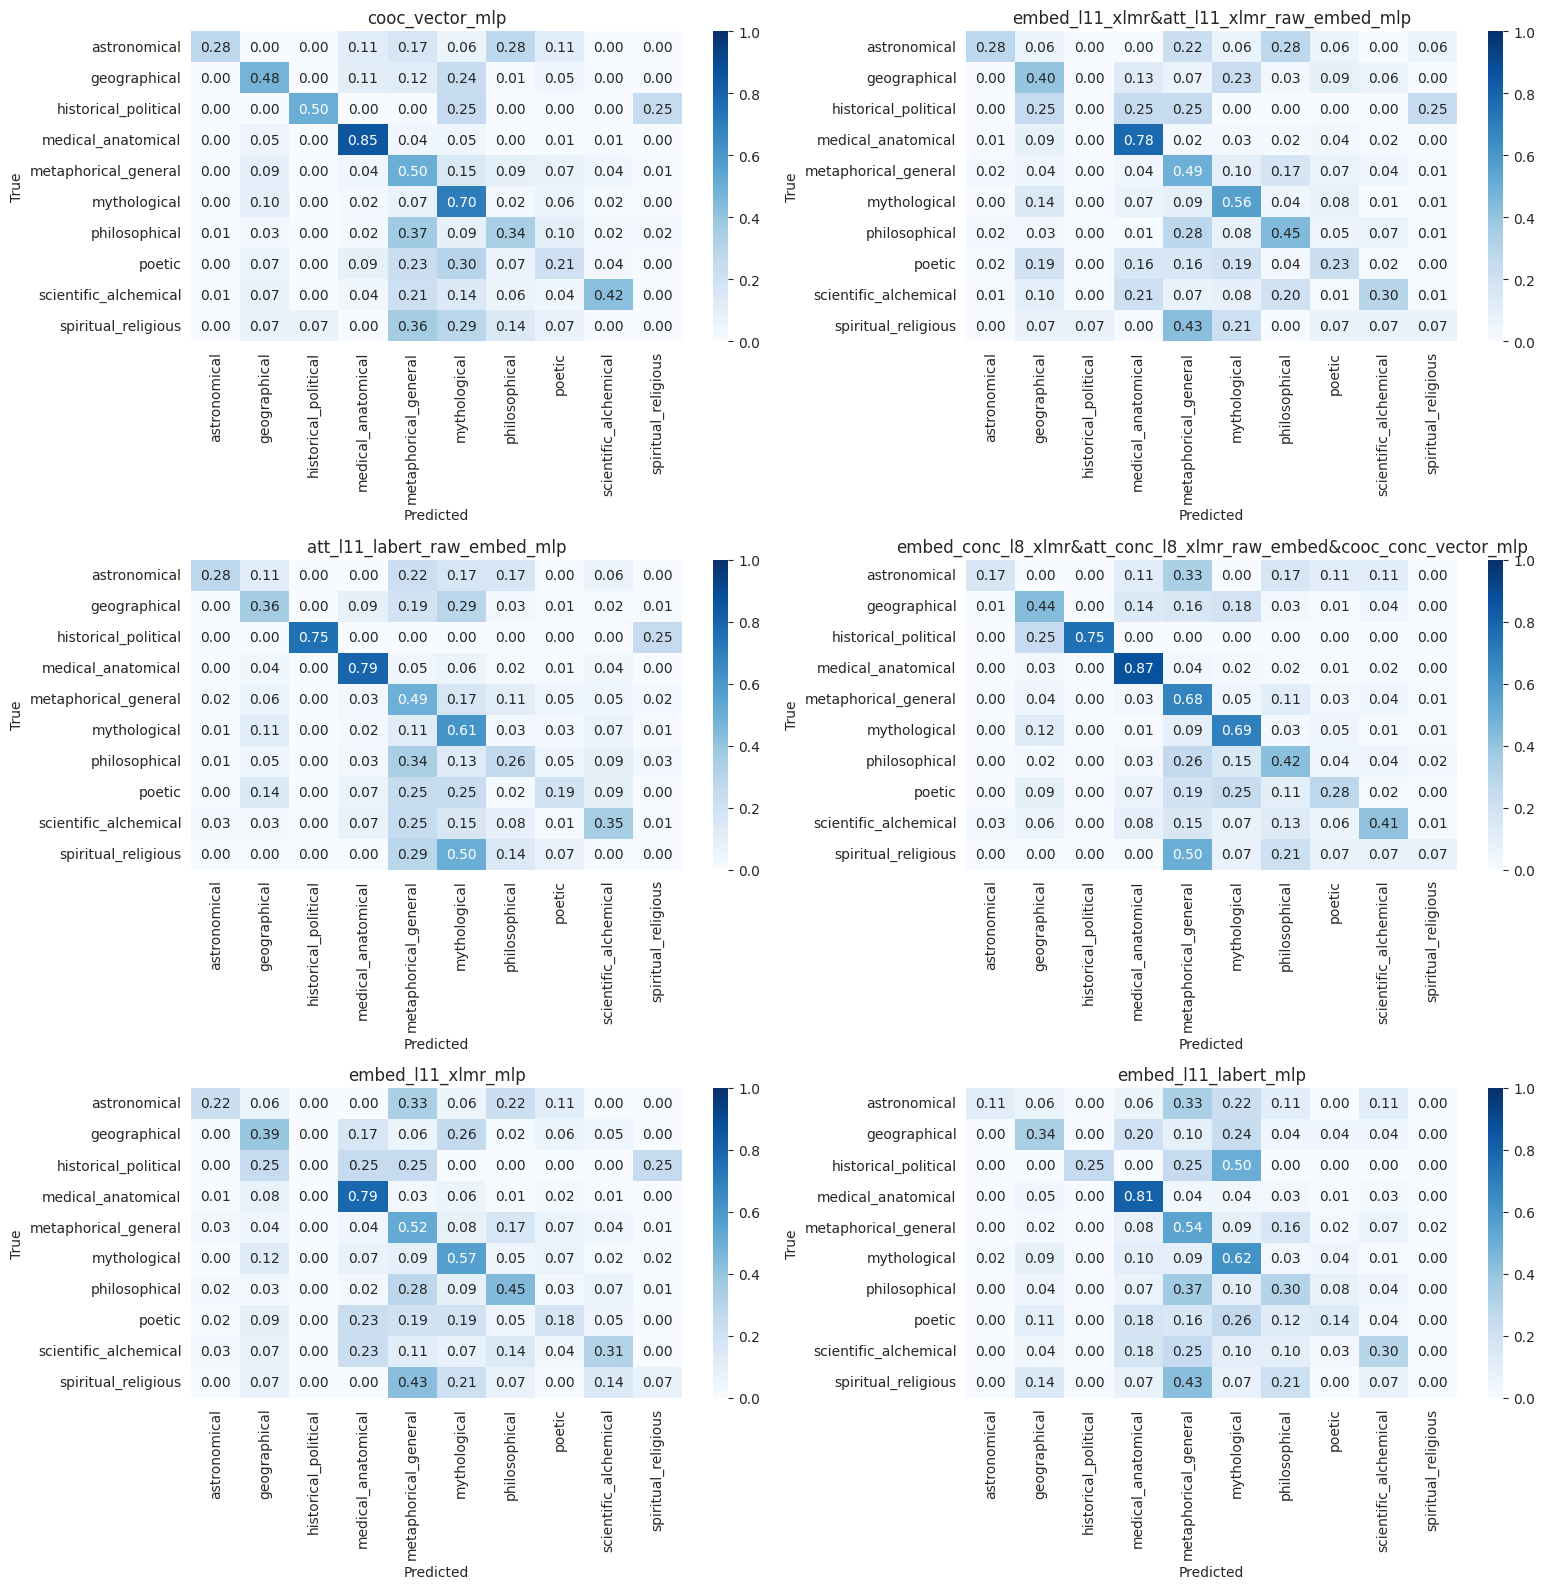

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

titles_ordered = [
    'cooc_vector_mlp',
    'embed_l11_xlmr&att_l11_xlmr_raw_embed_mlp',
    'att_l11_labert_raw_embed_mlp',
    'embed_conc_l8_xlmr&att_conc_l8_xlmr_raw_embed&cooc_conc_vector_mlp',
    'embed_l11_xlmr_mlp',
    'embed_l11_labert_mlp'
]

def plot_confusion_matrix(ax, y_true, y_pred, title):
    labels = unique_labels(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')
    sns.heatmap(
        cm, annot=True, fmt=".2f", cmap="Blues",
        xticklabels=labels, yticklabels=labels, ax=ax,
        vmin=0.0, vmax=1.0
    )
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title(title)
    ax.tick_params(axis='x')

fig, axes = plt.subplots(3, 2, figsize=(16, 16))
axes = axes.flatten()

for idx, title in enumerate(titles_ordered):
    y_pred = y_preds[title]
    plot_confusion_matrix(axes[idx], y, y_pred, title)

plt.tight_layout()
plt.show()

In [96]:
fig.savefig("../figures/labyrinthus_confusion_matrix_best_models.png", dpi=300)

In [ ]:
titles_ordered  = ['cooc_vector_mlp', 'embed_l11_xlmr&att_l11_xlmr_raw_embed_mlp', 'att_l11_labert_raw_embed_mlp', 'embed_conc_l8_xlmr&att_conc_l8_xlmr_raw_embed&cooc_conc_vector_mlp', 'embed_l11_xlmr_mlp', 'embed_l11_labert_mlp']


In [ ]:
for title, y_pred in y_preds.items():
    labyrinthus_df_classified[title] = y_pred
    plot_confusion_matrix(y, y_pred)

## Backup

In [ ]:
for model in ["xlmr", "labert"]:
    for context in ["sentence", "concordance"]:
        for L in range(7, 12):
            if context == "sentence":
                emb1 = f"embed_l{L}_{model}"
                #emb2 = f"att_l{L}_{model}_svd400_embed"

            else:
                emb1 = f"embed_conc_l{L}_{model}"
                #emb2 = f"att_conc_l{L}_{model}_svd400_embed"


In [119]:
# ------------------------------------------------------------------
# Concatenated features: Contextual + Attention (Layer 11)
# ------------------------------------------------------------------
X = np.stack(labyrinthus_df["svd400"].values)                 # shape (N, 768)

# Concatenate along feature axis → shape (N, 1168)
X_combined = np.concatenate([X], axis=1)

y  = labyrinthus_df["classification_single_label"].values           # 21 classes incl. “other”


# Evaluate
f1_combined = cross_val_score(pipe, X_combined, y, cv=cv, scoring="f1_macro").mean()
print(f"Baseline F1 macro= {f1_combined:.4f}")

Baseline F1 macro= 0.3545


In [19]:
# ------------------------------------------------------------------
# Concatenated features: Contextual + Attention (Layer 11)
# ------------------------------------------------------------------
X_embed = np.stack(labyrinthus_df["embed_conc_l11"].values)                 # shape (N, 768)
X_attn  = np.stack(labyrinthus_df["att_conc_l11_svd400_embed"].values)      # shape (N, 400)

# Concatenate along feature axis → shape (N, 1168)
X_combined = np.concatenate([X_embed, X_attn], axis=1)

# Evaluate
f1_combined = cross_val_score(pipe, X_combined, y, cv=cv, scoring="f1_macro").mean()
print(f"Layer 11 (combined): F1_macro = {f1_combined:.4f}")

Layer 11 (combined): F1_macro = 0.4033


In [25]:


# Initialize CV and target
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y = labyrinthus_df["classification_single"].values

# Define input features
all_features = {
    "sent_ctx": sentence_contextual_embeddings,
    "sent_att": sentence_attention_embeddings,
    "conc_ctx": concordance_contextual_embeddings[::2],  # only embeddings
    "conc_att": concordance_attention_embeddings,
}

# Classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=4000, multi_class="multinomial", solver="lbfgs", n_jobs=-1),
    "LinearSVC": LinearSVC(max_iter=4000, dual=False)
}

# Collect results
results = []

for source, cols in all_features.items():
    for col in cols:
        X = np.stack(labyrinthus_df[col].values)
        X_scaled = StandardScaler(with_mean=False).fit_transform(X)
        for clf_name, clf in classifiers.items():
            y_pred = cross_val_predict(clf, X_scaled, y, cv=cv)
            acc = accuracy_score(y, y_pred)
            f1 = f1_score(y, y_pred, average="macro")
            results.append((source, col, clf_name, acc, f1))

# Results summary
results_independent_df = pd.DataFrame(results, columns=["context", "feature", "classifier", "accuracy", "f1_macro"])
results_independent_df

,context,feature,classifier,accuracy,f1_macro
0,sent_ctx,embed_l6,LogisticRegression,0.486900,0.336805
1,sent_ctx,embed_l6,LinearSVC,0.467249,0.331687
2,sent_ctx,embed_l7,LogisticRegression,0.493450,0.347568
3,sent_ctx,embed_l7,LinearSVC,0.484716,0.352115
4,sent_ctx,embed_l8,LogisticRegression,0.482533,0.372390
5,sent_ctx,embed_l8,LinearSVC,0.465066,0.352629
6,sent_ctx,embed_l9,LogisticRegression,0.504367,0.389683
7,sent_ctx,embed_l9,LinearSVC,0.480349,0.374440
8,sent_ctx,embed_l10,LogisticRegression,0.497817,0.347348
9,sent_ctx,embed_l10,LinearSVC,0.486900,0.354883


In [89]:
results_independent_df.to_csv("../data/labyrinthus_classification_results_independent.csv", index=False)

In [28]:
combined_results = []

for L in range(6, 12):
    # sentence context
    X_ctx = np.stack(labyrinthus_df[f"embed_l{L}"].values)
    X_att = np.stack(labyrinthus_df[f"att_l{L}_svd400_embed"].values)
    X = np.concatenate([X_ctx, X_att], axis=1)
    X_scaled = StandardScaler(with_mean=False).fit_transform(X)

    for clf_name, clf in classifiers.items():
        y_pred = cross_val_predict(clf, X_scaled, y, cv=cv)
        acc = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred, average="macro")
        combined_results.append((f"sentence_L{L}", clf_name, acc, f1))

    # concordance context
    X_ctx = np.stack(labyrinthus_df[f"embed_conc_l{L}"].values)
    X_att = np.stack(labyrinthus_df[f"att_conc_l{L}_svd400_embed"].values)
    X = np.concatenate([X_ctx, X_att], axis=1)
    X_scaled = StandardScaler(with_mean=False).fit_transform(X)

    for clf_name, clf in classifiers.items():
        y_pred = cross_val_predict(clf, X_scaled, y, cv=cv)
        acc = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred, average="macro")
        combined_results.append((f"concordance_L{L}", clf_name, acc, f1))

# Display
combined_df = pd.DataFrame(combined_results, columns=["combo", "classifier", "accuracy", "f1_macro"])

KeyboardInterrupt: 

In [109]:
combined_df

,combo,classifier,accuracy,f1_macro
0,sentence_L6,LogisticRegression,0.538210,0.411450
1,sentence_L6,LinearSVC,0.515284,0.402585
2,concordance_L6,LogisticRegression,0.548035,0.411323
3,concordance_L6,LinearSVC,0.516376,0.411692
4,sentence_L7,LogisticRegression,0.538210,0.411574
5,sentence_L7,LinearSVC,0.527293,0.438656
6,concordance_L7,LogisticRegression,0.550218,0.451794
7,concordance_L7,LinearSVC,0.525109,0.421798
8,sentence_L8,LogisticRegression,0.528384,0.399472
9,sentence_L8,LinearSVC,0.497817,0.393716


In [92]:
combined_df.to_csv("../data/combined_single-layers.csv", index=False)

In [39]:
labyrinthus_df_short = labyrinthus_df[labyrinthus_df["classification_single_label"].isin(["medical_anatomical","mythological", "metaphorical_general","geographical"])]
len(labyrinthus_df_short) / len(labyrinthus_df)

0.7205240174672489

In [85]:
def combined_layers(df, input, layer_range, svd, pipe=None, cv=None, clf=None):
    if pipe is None:
        pipe = make_pipeline(
            StandardScaler(with_mean=False),
            LogisticRegression(max_iter=4000,
                               multi_class="multinomial",
                               solver="lbfgs",
                               n_jobs=-1)
        )
    if cv is None:
        cv = StratifiedKFold(n_splits=5, shuffle=True)
    if clf is None:
        clf = LogisticRegression(max_iter=4000, multi_class="multinomial", solver="lbfgs", n_jobs=-1)

    if input == "sentence":
        X_stack = np.stack([np.stack(df[f"embed_l{L}"].values) for L in layer_range], axis=0)
        X_att_stack = np.stack([np.stack(df[f"att_l{L}_svd400_embed"].values) for L in layer_range], axis=0)
    else:
        X_stack = np.stack([np.stack(df[f"embed_conc_l{L}"].values) for L in layer_range], axis=0)
        X_att_stack = np.stack([np.stack(df[f"att_conc_l{L}_svd400_embed"].values) for L in layer_range], axis=0)

    # Reshape to (n_samples, total_features)
    X_stack = X_stack.transpose(1, 0, 2).reshape(len(df), -1)
    X_att_stack = X_att_stack.transpose(1, 0, 2).reshape(len(df), -1)

    # Concatenate embeddings and attentions
    X = np.concatenate([X_stack, X_att_stack], axis=1)

    # Normalize and reduce
    X_scaled = StandardScaler(with_mean=False).fit_transform(X)
    if svd:
        svd = TruncatedSVD(n_components=800, random_state=42)
        X_scaled = svd.fit_transform(X_scaled)
    y = df["classification_single_label"].values
    y_preds, f1s, accs = [], [], []
    for _ in range(10):
        y_pred = cross_val_predict(clf, X_scaled, y, cv=cv)
        acc = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred, average="macro")
        y_preds.append(y_pred)
        f1s.append(f1)
        accs.append(acc)
    return y_preds, f1s, accs

In [86]:
y_preds, f1s, accs = combined_layers(labyrinthus_df, "sentence", layer_range=range(7, 9), svd=True)
f1s

[0.4032171790180076,
 0.38507047031329417,
 0.3837455152385959,
 0.4314610866199769,
 0.38119408962115925,
 0.4340041667353793,
 0.45961275483336916,
 0.41663889575825036,
 0.414103964395645,
 0.44278344806773007]

In [120]:
results_dicts = []

for layer_range in [
    (6,6), (7,7), (8,8), (9,9), (10,10), (11,11),
    (6,7),(7, 8), (8, 9), (9, 10), (10, 11),
    (6,8),(7, 9), (8, 10), (9, 11),
    (6,9),(7, 10), (8, 11),
    (6,10),(7, 11),
    (6,11)
    ]:
    #for svd in [True, False]:
    y_preds, f1s, accs = combined_layers(labyrinthus_df, "sentence", layer_range=layer_range, svd=False)
    results_dicts.append({"Context": "sentence", "Layer range": layer_range, "y_preds" : y_preds, "Accuracies": np.mean(accs), "F1-macros": f1s, "F1_avr" : np.mean(f1s)})
    y_preds, f1s, accs = combined_layers(labyrinthus_df, "concordance", layer_range=layer_range, svd=False)
    results_dicts.append({"Context": "concordance", "Layer range": layer_range, "y_preds" : y_preds, "Accuracies": np.mean(accs), "F1-macros": f1s, "F1_avr" : np.mean(f1s)})

In [121]:
results_df = pd.DataFrame(results_dicts)
results_df

,Context,Layer range,y_preds,Accuracies,F1-macros,F1_avr
0,sentence,"(6, 6)","[[metaphorical_general, metaphorical_general, ...",0.534170,"[0.4287132960239554, 0.4197612538855159, 0.401...",0.402345
1,concordance,"(6, 6)","[[metaphorical_general, metaphorical_general, ...",0.532205,"[0.3923699064467322, 0.41858985959768064, 0.39...",0.400745
2,sentence,"(7, 7)","[[metaphorical_general, metaphorical_general, ...",0.539520,"[0.4313686024542906, 0.43665942696333754, 0.42...",0.429619
3,concordance,"(7, 7)","[[metaphorical_general, metaphorical_general, ...",0.519541,"[0.4078754258548839, 0.40811962700432575, 0.36...",0.399701
4,sentence,"(8, 8)","[[metaphorical_general, metaphorical_general, ...",0.521725,"[0.430975897789401, 0.43033965408836183, 0.431...",0.407748
5,concordance,"(8, 8)","[[metaphorical_general, spiritual_religious, m...",0.527948,"[0.4384224041372657, 0.40879735774140835, 0.42...",0.412273
6,sentence,"(9, 9)","[[metaphorical_general, mythological, metaphor...",0.525218,"[0.41040343080937997, 0.39844929970017245, 0.4...",0.414974
7,concordance,"(9, 9)","[[metaphorical_general, mythological, metaphor...",0.531550,"[0.451828513989122, 0.4329452866125177, 0.4337...",0.425644
8,sentence,"(10, 10)","[[metaphorical_general, mythological, spiritua...",0.548253,"[0.43058108176421095, 0.41343134018155603, 0.4...",0.426820
9,concordance,"(10, 10)","[[metaphorical_general, mythological, metaphor...",0.541703,"[0.39850341200157713, 0.44723034426319225, 0.4...",0.414783


In [122]:
results_df["best_perf_i"] =  results_df["F1-macros"].apply(lambda my_list: max(enumerate(my_list), key=lambda x: x[1])[0])

In [123]:
results_df["best_perf"] =  results_df["F1-macros"].apply(lambda my_list: max(enumerate(my_list), key=lambda x: x[1])[1])

In [124]:
results_df

,Context,Layer range,y_preds,Accuracies,F1-macros,F1_avr,best_perf_i,best_perf
0,sentence,"(6, 6)","[[metaphorical_general, metaphorical_general, ...",0.534170,"[0.4287132960239554, 0.4197612538855159, 0.401...",0.402345,0,0.428713
1,concordance,"(6, 6)","[[metaphorical_general, metaphorical_general, ...",0.532205,"[0.3923699064467322, 0.41858985959768064, 0.39...",0.400745,3,0.419482
2,sentence,"(7, 7)","[[metaphorical_general, metaphorical_general, ...",0.539520,"[0.4313686024542906, 0.43665942696333754, 0.42...",0.429619,8,0.456649
3,concordance,"(7, 7)","[[metaphorical_general, metaphorical_general, ...",0.519541,"[0.4078754258548839, 0.40811962700432575, 0.36...",0.399701,3,0.431403
4,sentence,"(8, 8)","[[metaphorical_general, metaphorical_general, ...",0.521725,"[0.430975897789401, 0.43033965408836183, 0.431...",0.407748,2,0.431843
5,concordance,"(8, 8)","[[metaphorical_general, spiritual_religious, m...",0.527948,"[0.4384224041372657, 0.40879735774140835, 0.42...",0.412273,4,0.448307
6,sentence,"(9, 9)","[[metaphorical_general, mythological, metaphor...",0.525218,"[0.41040343080937997, 0.39844929970017245, 0.4...",0.414974,2,0.442328
7,concordance,"(9, 9)","[[metaphorical_general, mythological, metaphor...",0.531550,"[0.451828513989122, 0.4329452866125177, 0.4337...",0.425644,0,0.451829
8,sentence,"(10, 10)","[[metaphorical_general, mythological, spiritua...",0.548253,"[0.43058108176421095, 0.41343134018155603, 0.4...",0.426820,6,0.437002
9,concordance,"(10, 10)","[[metaphorical_general, mythological, metaphor...",0.541703,"[0.39850341200157713, 0.44723034426319225, 0.4...",0.414783,7,0.448885


In [125]:
results_df.to_csv("../data/classification_combining-layers.csv", index=False)

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=unique_labels(y_true, y_pred))
    labels = unique_labels(y_true, y_pred)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels, ax=ax)

    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title("Confusion Matrix")
    plt.xticks(rotation=45)
    plt.tight_layout()

    return fig


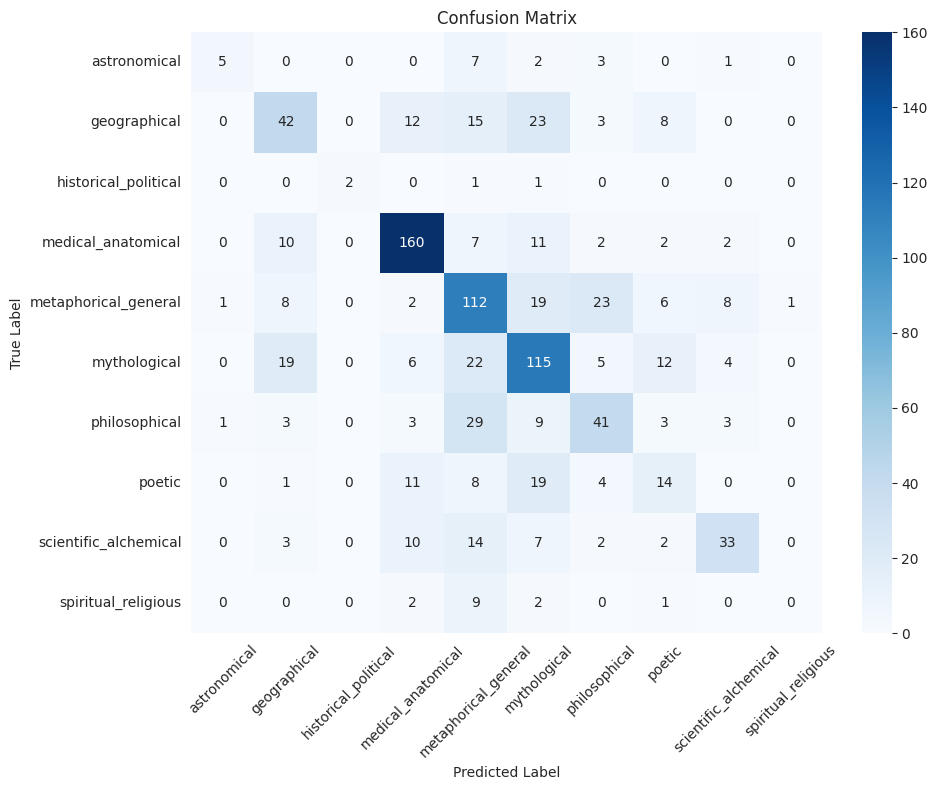

In [102]:
y_pred = results_df.iloc[21]["y_preds"][5]
fig = plot_confusion_matrix(labyrinthus_df["classification_single_label"], y_pred)
# fig.savefig("confusion_matrix.png")

In [103]:
fig.savefig("../figures/labyrinthus_classification_confusion_matrix_l8-12.png", dpi=300)

In [ ]:
fig.savefig("../figures/labyrinthus_classification_confusion_matrix_l8-12.png", dpi=300)

In [85]:
labyrinthus_df.head(5)

,author,title,grela_id,sentence_id,sentence_text,context_3sents,tokens,concordance_tokens,classification,not_before,...,embed_l8,att_l8,embed_l9,att_l9,embed_l10,att_l10,embed_l11,att_l11,svd300,svd400
0,Humbertus Silvae Candidae1010-1061,Adversus Simoniacos,cc_10012,cc_10012_2812,"Exploret qui potest qualiter, et qua hunc laby...","Si enim, ut philosophus allegat, qui non prohi...","[{'char_end': 8, 'char_start': 0, 'lemma': 'ex...","[{'char_end': 303, 'char_start': 299, 'lemma':...",metaphorical,1010.0,...,"[-0.5996939, -0.08402276, 0.24582314, 0.246073...","{'exploro': {'weight': 0.007501654326915741, '...","[-0.4901215, -0.014518358, 0.11257135, -0.0287...","{'exploro': {'weight': 0.0040437448769807816, ...","[-0.22389103, -0.08037936, 0.4684307, -0.07405...","{'exploro': {'weight': 0.0023853108286857605, ...","[0.015361398, -0.05652492, 0.28677505, -0.2481...","{'exploro': {'weight': 0.004686874337494373, '...","[1.0248758, -0.109425925, 0.18502058, -0.12902...","[1.0248758, -0.10942612, 0.18502046, -0.129020..."
1,Petrus Damianus,"Patrologia Latina, vol. 145",cc_10077,cc_10077_50,"Et poenae factus est auctor, qui poenalis laby...","Protinus igitur projectus in taurum, quod infe...","[{'char_end': 2, 'char_start': 0, 'lemma': 'et...","[{'char_end': 83, 'char_start': 75, 'lemma': '...","poetic, metaphorical",1007.0,...,"[-0.55678105, -0.031190008, 0.18337364, 0.4370...","{'et': {'weight': 0.003848183201625943, 'piece...","[-0.4923613, -0.1829148, 0.15112661, 0.3343788...","{'et': {'weight': 0.006557437125593424, 'piece...","[-0.3993842, -0.17896965, 0.33668458, 0.163039...","{'et': {'weight': 0.0010180403478443623, 'piec...","[-0.053815715, -0.15342486, 0.2319887, -0.1168...","{'et': {'weight': 0.005556851625442505, 'piece...","[0.96935123, -0.052010406, 0.13268225, -0.0820...","[0.9693511, -0.052010484, 0.1326823, -0.082074..."
2,Rodulphus S. Trudonis,Vita S. Lietberti,cc_10161,cc_10161_32,mirantibus magistris penetrat labyrinthos Scri...,Ducitur sitibundo pectore currens ad fontem ph...,"[{'char_end': 10, 'char_start': 0, 'lemma': 'm...","[{'char_end': 144, 'char_start': 136, 'lemma':...","metaphorical, philosophical",NaN,...,"[-0.070512734, -0.010591162, -0.093808964, 0.2...","{'miro': {'weight': 0.03680548816919327, 'piec...","[-0.10879725, 0.09882534, -0.008079263, 0.1313...","{'miro': {'weight': 0.01636236347258091, 'piec...","[-0.23412725, 0.0044030286, 0.25399756, 0.1273...","{'miro': {'weight': 0.00277316989377141, 'piec...","[-0.034478694, 0.042206235, 0.24609125, -0.210...","{'miro': {'weight': 0.004833581391721964, 'pie...","[0.98060316, -0.115663484, -0.026802924, -0.18...","[0.98060316, -0.11566342, -0.02680232, -0.1812..."
3,Domnizo Canusinus,Vita et carmina Mathildis,cc_10261,cc_10261_892,"Ista fuit, quae par habuit regemque Deumque, H...","Ista fuit, quae diripuit Paulumque Petrumque; ...","[{'char_end': 4, 'char_start': 0, 'lemma': 'is...","[{'char_end': 43, 'char_start': 40, 'lemma': '...","metaphorical, poetic",1130.0,...,"[-0.20573536, 0.0940672, 0.14274016, 0.2886553...","{'iste': {'weight': 0.001744522713124752, 'pie...","[-0.23654726, 0.043308813, 0.059855238, 0.2533...","{'iste': {'weight': 0.0017882290994748473, 'pi...","[-0.23956929, -0.014918415, 0.138808, 0.211936...","{'iste': {'weight': 0.0018670707941055298, 'pi...","[0.022103995, -0.04788581, 0.04260912, -0.0920...","{'iste': {'weight': 0.005081632640212774, 'pie...","[1.101139, 0.7583047, -0.082435116, -0.2232320...","[1.1011388, 0.75830466, -0.08243356, -0.223232..."
4,Durandus Trobarnensis,Liber de corpore et sanguine Christi,cc_10298,cc_10298_920,Uerum quia quidam peruersi ex hac tanti doctor...,Xxui. | Uerum quia quidam peruersi ex hac tant...,"[{'char_end': 5, 'char_start': 0, 'lemma': 'ue...","[{'char_end': 10, 'char_start': 6, 'lemma': 'q...",metaphorical,NaN,...,"[-0.41097933, 0.07569985, 0.18987988, 0.161353...","{'uerus': {'weight': 0.005245175678282976, 'pi...","[-0.40861088, -0.1697307, 0.14324735, 0.064479...","{'uerus': {'wei

In [ ]:
surface = labyrinthus_df'["concordance_tokens"].apply(
    lambda toks: next(t for t in toks if t["lemma"].lower() == "labyrinthus")["token_text"].lower()
)

palette = {f: c for f, c in zip(surface.unique(), plt.cm.Set1.colors)}


fig, [ax1, ax2] = plt.subplots(2,1, figsize=(5, 5))

emb_array = np.stack(labyrinthus_df["embed_hybrid_allpos"].values)
proj_series = compute_projections(emb_array)

proj_key = "umap_10_0.05"
xs = proj_series.str[proj_key].str["x"]
ys = proj_series.str[proj_key].str["y"]

ax1.scatter(xs, ys, c=surface.map(palette), s=8)
ax1.set_title(f"{proj_key} of lemmatized target word embeddings coloured by surface form")
ax1.axis("off")

emb_array = np.stack(labyrinthus_df["embed_surface_allpos"].values)
proj_series = compute_projections(emb_array)

proj_key = "umap_10_0.05"

xs = proj_series.str[proj_key].str["x"]
ys = proj_series.str[proj_key].str["y"]
ax2.scatter(xs, ys, c=surface.map(palette), s=8)
ax2.set_title(f"{proj_key} of un-lemmatized target word embeddings coloured by surface form")
ax2.axis("off")

plt.show()